In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.applications import mobilenet
from keras.layers import Dense, GlobalAveragePooling2D, Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.models import Model, Sequential
from keras import models
from keras import layers
from keras.optimizers import Adam, RMSprop, SGD
from util.plots import plot_history

Using TensorFlow backend.


In [2]:
train_path = '../potato_and_catfood/train'
valid_path = '../potato_and_catfood/valid'
test_path = '../potato_and_catfood/test'

In [3]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        brightness_range=(0.65,1.35),
        vertical_flip=True,
        horizontal_flip=True)

valid_datagen = ImageDataGenerator(
        rescale=1./255
)

# Train data generator
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(224, 224),
        batch_size=batch_size,
        classes=['potato', 'catfood', 'table'])

# Validation data generator
validation_generator = valid_datagen.flow_from_directory(
        valid_path,
        target_size=(224, 224),
        batch_size=batch_size,
        classes=['potato', 'catfood', 'table'])

# this is a similar generator, for validation data
test_generator = valid_datagen.flow_from_directory(
        test_path,
        target_size=(224, 224),
        batch_size=batch_size,
        classes=['potato', 'catfood', 'table'])

Found 446 images belonging to 3 classes.
Found 150 images belonging to 3 classes.
Found 35 images belonging to 3 classes.


In [4]:
model = Sequential()
model.add(Flatten(input_shape=(224,224,3)))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(3))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.001),
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               77070848  
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 1539      
_________________________________________________________________
activation_2 (Activation)    (None, 3)                 0         
Total params: 77,072,387
Trainable params: 77,072,387
Non-trainable params: 0
_________________________________________________________________


In [5]:
history = model.fit_generator(
            train_generator,
            steps_per_epoch=446 // batch_size,
            epochs=100,
            validation_data=validation_generator,
            validation_steps=150 // batch_size)

Epoch 1/100
13/13 [==============================] - 14s 1s/step - loss: 2.9315 - acc: 0.3500 - val_loss: 1.0746 - val_acc: 0.4609
Epoch 2/100
13/13 [==============================] - 10s 807ms/step - loss: 1.1096 - acc: 0.4008 - val_loss: 1.1357 - val_acc: 0.2966
Epoch 3/100
13/13 [==============================] - 8s 617ms/step - loss: 1.1023 - acc: 0.3558 - val_loss: 1.0834 - val_acc: 0.5424
Epoch 4/100
13/13 [==============================] - 7s 532ms/step - loss: 1.1074 - acc: 0.3435 - val_loss: 1.0913 - val_acc: 0.5085
Epoch 5/100
13/13 [==============================] - 6s 478ms/step - loss: 1.1218 - acc: 0.3320 - val_loss: 1.1330 - val_acc: 0.2119
Epoch 6/100
13/13 [==============================] - 7s 519ms/step - loss: 1.0958 - acc: 0.3835 - val_loss: 1.0921 - val_acc: 0.4609
Epoch 7/100
13/13 [==============================] - 7s 558ms/step - loss: 1.0910 - acc: 0.3786 - val_loss: 1.1090 - val_acc: 0.2119
Epoch 8/100
13/13 [==============================] - 6s 466ms/step - l

13/13 [==============================] - 8s 607ms/step - loss: 1.0090 - acc: 0.4663 - val_loss: 1.2104 - val_acc: 0.2458
Epoch 63/100
13/13 [==============================] - 6s 480ms/step - loss: 1.0042 - acc: 0.4881 - val_loss: 1.0400 - val_acc: 0.3729
Epoch 64/100
13/13 [==============================] - 6s 480ms/step - loss: 1.0464 - acc: 0.4971 - val_loss: 1.0031 - val_acc: 0.5593
Epoch 65/100
13/13 [==============================] - 7s 528ms/step - loss: 0.9898 - acc: 0.5096 - val_loss: 1.0969 - val_acc: 0.3898
Epoch 66/100
13/13 [==============================] - 8s 591ms/step - loss: 0.9698 - acc: 0.5370 - val_loss: 1.0282 - val_acc: 0.5781
Epoch 67/100
13/13 [==============================] - 9s 654ms/step - loss: 1.0171 - acc: 0.4982 - val_loss: 1.1043 - val_acc: 0.3898
Epoch 68/100
13/13 [==============================] - 6s 490ms/step - loss: 1.0181 - acc: 0.4776 - val_loss: 1.0365 - val_acc: 0.5169
Epoch 69/100
13/13 [==============================] - 7s 549ms/step - loss:

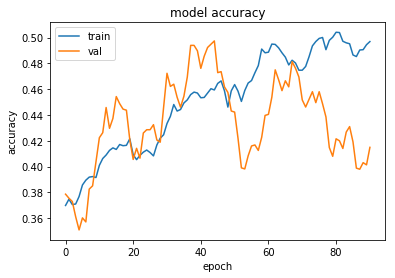

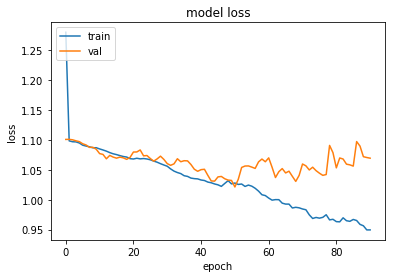

In [7]:
plot_history(history, mean_N=10)

In [12]:
test_generator = valid_datagen.flow_from_directory(
        test_path,
        target_size=(224, 224),
        batch_size=batch_size,
        classes=['potato', 'catfood', 'table'])

imgs, labels = next(test_generator)

#ynew = model.predict(imgs)

model.evaluate(imgs,labels, batch_size=batch_size)

Found 35 images belonging to 3 classes.
32/32 [==============================] - 0s 677us/step


[0.919400691986084, 0.59375]

In [23]:
model.predict(imgs)[7]

array([0.19283403, 0.37963066, 0.42753533], dtype=float32)

In [24]:
labels[7]

array([0., 1., 0.], dtype=float32)